In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd

base_path = '/content/drive/My Drive/Quantum_Computers/QItaly_Challenge_Wizard/Datasets/pollutants/'

# Define paths for each dataset
# path_1 = base_path + 'monitoraggio_aria_01_010824-140824.csv'  # Data from Aug 1, 2024 to Aug 14, 2024
# path_2 = base_path + 'monitoraggio_aria_02_150824-310824.csv'  # Data from 15 Aug, 2024 to Aug 31, 2024
path_3 = base_path + 'monitoraggio_aria_03_010924-140924.csv'  # Data from Sep 1, 2024 to Sep 14, 2024
path_4 = base_path + 'monitoraggio_aria_04_150924_300924.csv'  # Data from Sep 15, 2024 to Sep 30, 2024
path_5 = base_path + 'monitoraggio_aria_05_011024-081024.csv'  # Data from Oct 1, 2024 to Oct 8, 2024

# Load the datasets into pandas DataFrames
# df1 = pd.read_csv(path_1)
# df2 = pd.read_csv(path_2)
df3 = pd.read_csv(path_3)
df4 = pd.read_csv(path_4)
df5 = pd.read_csv(path_5)

In [ ]:
total_dataset = pd.concat([df3, df4, df5], ignore_index=True)
print(total_dataset.head())
# df3.columns.tolist()

   row  col                 entry_date  \
0   15    5  2024-09-07T00:00:00+00:00   
1   15    5  2024-09-08T00:00:00+00:00   
2   15    5  2024-09-09T00:00:00+00:00   
3   15    5  2024-09-10T00:00:00+00:00   
4   15    5  2024-09-11T00:00:00+00:00   

                                            geometry  \
0  {"type":"Polygon","coordinates":[[[8.857534478...   
1  {"type":"Polygon","coordinates":[[[8.857534478...   
2  {"type":"Polygon","coordinates":[[[8.857534478...   
3  {"type":"Polygon","coordinates":[[[8.857534478...   
4  {"type":"Polygon","coordinates":[[[8.857534478...   

                                            centroid          CH4        CO  \
0  {"type":"Point","coordinates":[8.889543024,39....  1931.078735  0.033016   
1  {"type":"Point","coordinates":[8.889543024,39....  1931.078735  0.029585   
2  {"type":"Point","coordinates":[8.889543024,39....  1923.200684  0.029587   
3  {"type":"Point","coordinates":[8.889543024,39....  1923.200684  0.031236   
4  {"type":"Poi

In [ ]:
import pandas as pd
import json

# Assuming df3 is already loaded

# Function to extract coordinates from the centroid column
def extract_coordinates(centroid_str):
    try:
        # Convert the string to a dictionary
        centroid_dict = json.loads(centroid_str.replace("'", '"'))  # Ensure proper quotes for JSON
        # Extract the coordinates
        return tuple(centroid_dict["coordinates"])
    except (json.JSONDecodeError, KeyError):
        return None  # Return None if there's any issue

# Apply the function to extract coordinates
total_dataset['coordinates'] = total_dataset['centroid'].apply(extract_coordinates)

# Drop rows where the extraction failed (coordinates are None)
df_cleaned = total_dataset.dropna(subset=['coordinates'])

# Count distinct centroids (coordinate pairs)
distinct_centroids = df_cleaned['coordinates'].nunique()

print(f"Number of distinct centroids: {distinct_centroids}")


Number of distinct centroids: 146


In [ ]:
df_pollution=df_cleaned

In [ ]:
unique_pairs = df_cleaned[['row', 'col']].drop_duplicates()
print(unique_pairs.head(16))

     row  col
0     15    5
15    15    6
30    15    7
45    15    8
56    15    9
67    15   10
76    15   11
85    15   12
97    15   13
110   16    4
126   16    5
141   16    6
157   16    7
173   16    8
189   16    9
200   16   10


In [ ]:
import pandas as pd

unique_pairs = df_cleaned[['row', 'col']].drop_duplicates()
grouped = df_cleaned.groupby(['row', 'col'])

df_dict = {}

for i, ((row, col), group) in enumerate(grouped):
    # Store each group in the dictionary with keys based on row and col
    df_dict[f'df_row_{row}_col_{col}'] = group.reset_index(drop=True)

# Check the number of datasets created
print(f"Number of datasets created: {len(df_dict)}")

# Example: Accessing one of the datasets (for example, for row 15 and col 5)
df_example = df_dict['df_row_15_col_6']
print(df_example.head())

Number of datasets created: 146
   row  col                 entry_date  \
0   15    6  2024-09-07T00:00:00+00:00   
1   15    6  2024-09-08T00:00:00+00:00   
2   15    6  2024-09-09T00:00:00+00:00   
3   15    6  2024-09-10T00:00:00+00:00   
4   15    6  2024-09-11T00:00:00+00:00   

                                            geometry  \
0  {"type":"Polygon","coordinates":[[[8.921501673...   
1  {"type":"Polygon","coordinates":[[[8.921501673...   
2  {"type":"Polygon","coordinates":[[[8.921501673...   
3  {"type":"Polygon","coordinates":[[[8.921501673...   
4  {"type":"Polygon","coordinates":[[[8.921501673...   

                                            centroid          CH4        CO  \
0  {"type":"Point","coordinates":[8.953495844,39....  1909.019653  0.034560   
1  {"type":"Point","coordinates":[8.953495844,39....  1909.019653  0.031388   
2  {"type":"Point","coordinates":[8.953495844,39....  1940.980103  0.031579   
3  {"type":"Point","coordinates":[8.953495844,39....  1940.980

<ipython-input-30-4ffb098433b5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['entry_date'] = pd.to_datetime(group['entry_date'])


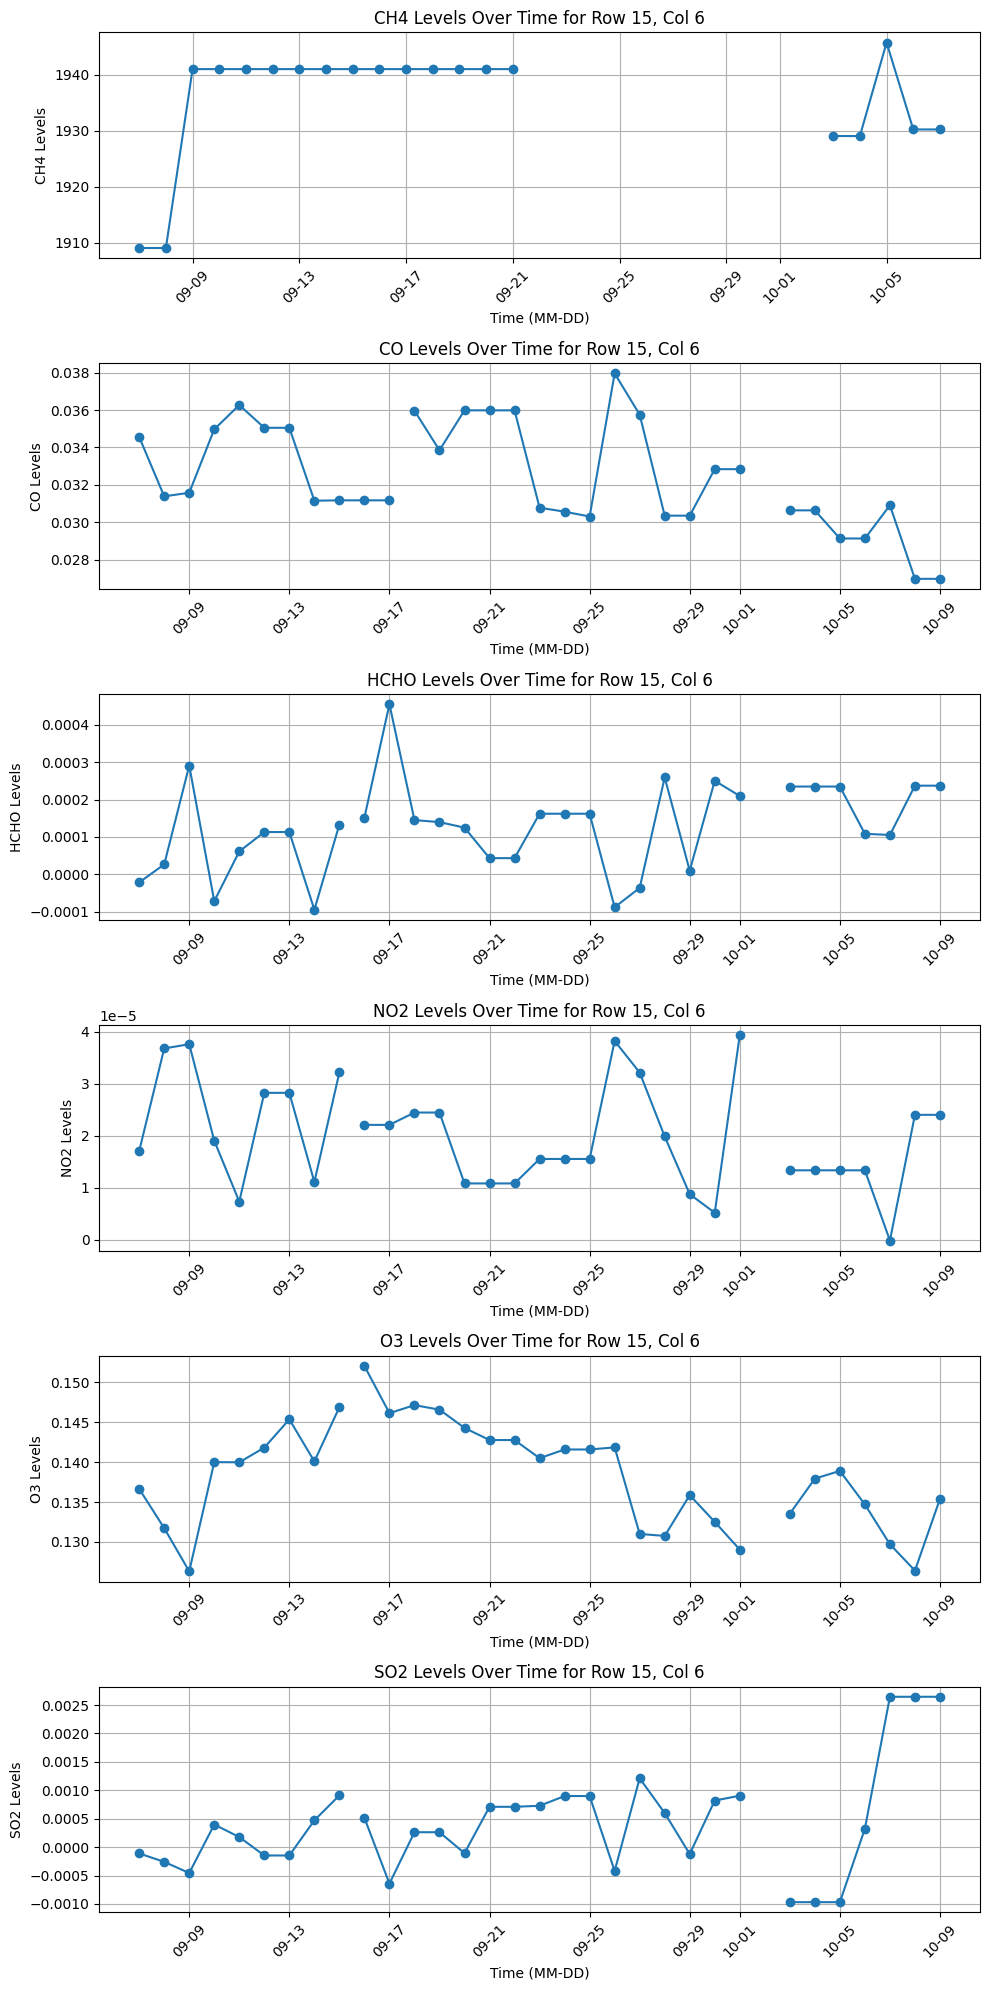

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'df_cleaned' is your DataFrame and contains pollution markers and 'row', 'col' columns

# Filter the dataset for a specific row and column pair (for example, row=15, col=5)
row_to_plot = 15
col_to_plot = 6
group = df_cleaned[(df_cleaned['row'] == row_to_plot) & (df_cleaned['col'] == col_to_plot)]

# Convert 'entry_date' to datetime if it's not already in datetime format
group['entry_date'] = pd.to_datetime(group['entry_date'])

# Set up the subplots for each pollution marker
pollutants = ['CH4', 'CO', 'HCHO', 'NO2', 'O3', 'SO2']
plt.figure(figsize=(10, 20))

# Loop through each pollutant and create a separate subplot for each
for i, pollutant in enumerate(pollutants, start=1):
    plt.subplot(6, 1, i)  # 6 rows, 1 column, i-th plot
    plt.plot(group['entry_date'], group[pollutant], marker='o', linestyle='-')

    # Set the title and labels
    plt.title(f'{pollutant} Levels Over Time for Row {row_to_plot}, Col {col_to_plot}')
    plt.xlabel('Time (MM-DD)')
    plt.ylabel(f'{pollutant} Levels')

    # Set the x-axis format to show only month and day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Add grid
    plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-36-5f3afa06786b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['entry_date'] = pd.to_datetime(group['entry_date'])
<ipython-input-36-5f3afa06786b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['entry_date'] = pd.to_datetime(group['entry_date'])
<ipython-input-36-5f3afa06786b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

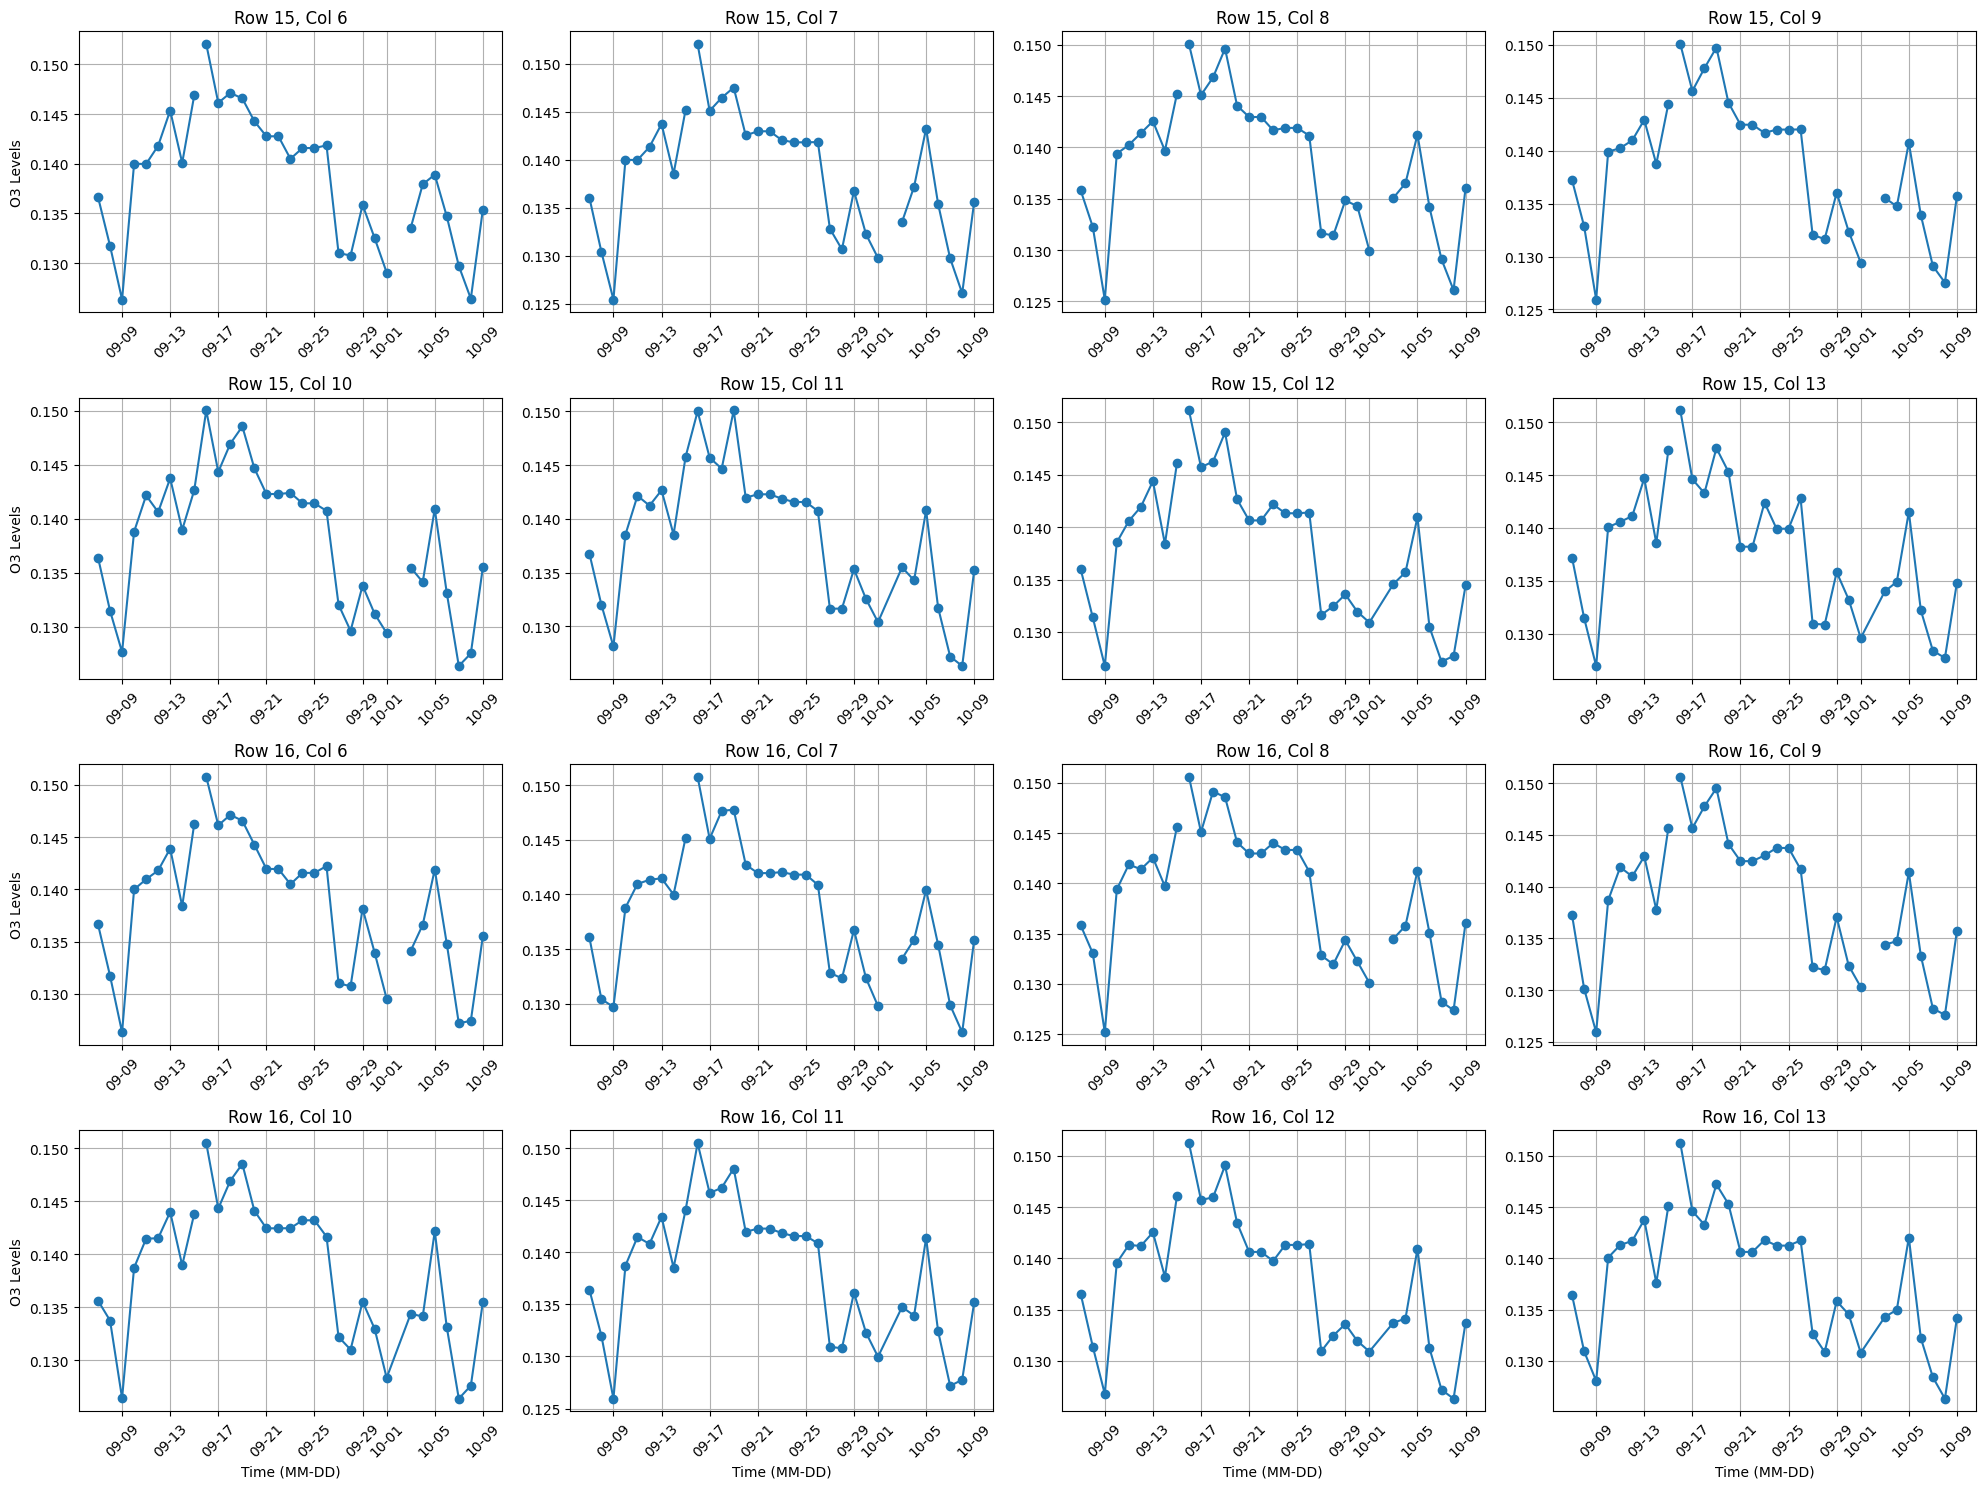

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'df_cleaned' is your DataFrame and contains pollution markers and 'row', 'col' columns

# Define the 16 (row, col) pairs to plot (you can adjust these values)
spots_to_plot = [
    (15, 6), (15, 7), (15, 8), (15, 9),
    (15, 10), (15, 11), (15, 12), (15, 13),
    (16, 6), (16, 7), (16, 8), (16, 9),
    (16, 10), (16, 11), (16, 12), (16, 13)
]

# Set up the 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 15))

# Loop through each (row, col) pair and create a plot for O3 levels
for idx, (row, col) in enumerate(spots_to_plot):
    # Filter the dataset for each (row, col) pair
    group = df_cleaned[(df_cleaned['row'] == row) & (df_cleaned['col'] == col)]

    # Convert 'entry_date' to datetime if it's not already in datetime format
    group['entry_date'] = pd.to_datetime(group['entry_date'])

    # Get the appropriate subplot (row and column index)
    ax = axs[idx // 4, idx % 4]  # 4x4 grid

    # Plot O3 levels over time
    ax.plot(group['entry_date'], group['O3'], marker='o', linestyle='-')

    # Set the title for each subplot
    ax.set_title(f'Row {row}, Col {col}')

    # Set the x-axis format to show only month and day
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    # Rotate x-axis labels for readability
    plt.setp(ax.get_xticklabels(), rotation=45)

    # Set labels for the leftmost and bottom plots only
    if idx % 4 == 0:  # First column
        ax.set_ylabel('O3 Levels')
    if idx // 4 == 3:  # Last row
        ax.set_xlabel('Time (MM-DD)')

    # Add grid
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# Now Studying The Unique Attendance

In [ ]:
base_path = '/content/drive/My Drive/Quantum_Computers/QItaly_Challenge_Wizard/Datasets/unique_attendance_15/'

# Define paths for each dataset

path_1 = base_path + 'presenza_15_010824-140824.csv'  # Data from Aug 1, 2024 to Aug 14, 2024
path_2 = base_path + 'presenza_15_150824-310824.csv'  # Data from 15 Aug, 2024 to Aug 31, 2024
path_3 = base_path + 'presenza_15_010924-140924.csv'  # Data from Sep 1, 2024 to Sep 14, 2024
path_4 = base_path + 'presenza_15_150924_300924.csv'  # Data from Sep 15, 2024 to Sep 30, 2024
path_5 = base_path + 'presenza_15_011024-081024.csv'  # Data from Oct 1, 2024 to Oct 8, 2024

# Load the datasets into pandas DataFrames
attendance_df1 = pd.read_csv(path_1)
attendance_df2 = pd.read_csv(path_2)
attendance_df3 = pd.read_csv(path_3)
attendance_df4 = pd.read_csv(path_4)
attendance_df5 = pd.read_csv(path_5)

# Display the first few rows of one of the datasets as an example
# df1.size

In [ ]:
import pandas as pd

# Combine the datasets into a single DataFrame
attendance_combined_df = pd.concat([attendance_df1, attendance_df2, attendance_df3, attendance_df4, attendance_df5], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(attendance_combined_df.head())


              datetime   value     areaAnalisi
0  2024-08-01 23:45:00  171783   Intero Comune
1  2024-08-01 23:45:00    8823  Cagliari - 011
2  2024-08-01 23:45:00   16795  Cagliari - 004
3  2024-08-01 23:45:00   16926  Cagliari - 009
4  2024-08-01 23:45:00   12083  Cagliari - 006


<ipython-input-42-31df9a82366d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intero_comune_df['datetime'] = pd.to_datetime(intero_comune_df['datetime'])
<ipython-input-42-31df9a82366d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intero_comune_df['date'] = intero_comune_df['datetime']


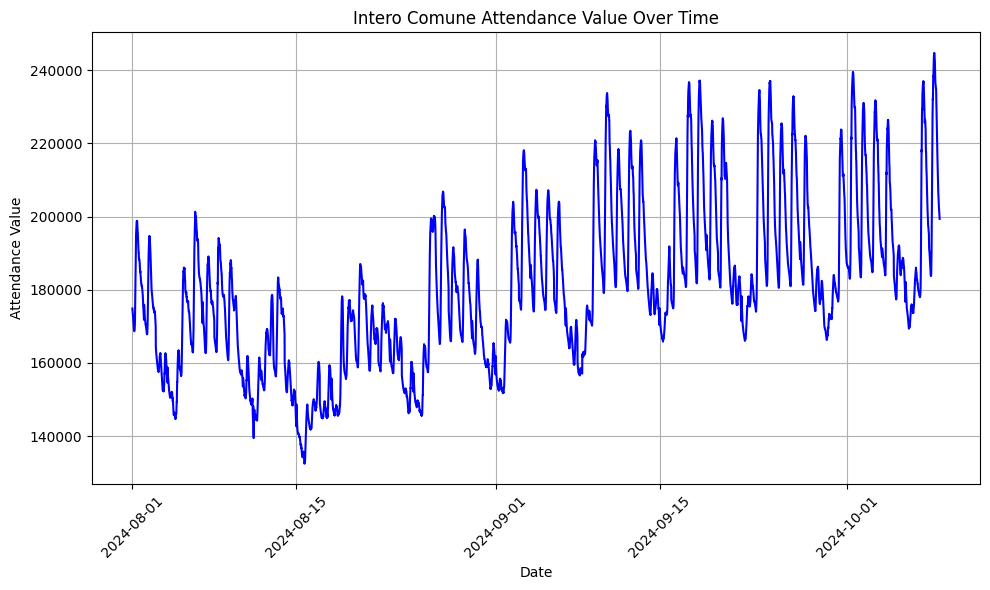

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for 'Intero Comune'
intero_comune_df = attendance_combined_df[attendance_combined_df['areaAnalisi'] == 'Intero Comune']

# Convert 'datetime' column to datetime type if not already
intero_comune_df['datetime'] = pd.to_datetime(intero_comune_df['datetime'])

# Group by date (remove time information) and sum the values for each day
intero_comune_df['date'] = intero_comune_df['datetime']
daily_values = intero_comune_df.groupby('date')['value'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_values.index, daily_values.values, linestyle='-', color='b')
plt.title('Intero Comune Attendance Value Over Time')
plt.xlabel('Date')
plt.ylabel('Attendance Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Ensure 'datetime' is in datetime format
intero_comune_df['datetime'] = pd.to_datetime(intero_comune_df['datetime'])

# Group by the date part of the 'datetime' column and aggregate the data
intero_comune_avg_df = intero_comune_df.groupby(intero_comune_df['datetime'].dt.date).agg({
    'value': 'mean',   # Average the 'value' column
    'areaAnalisi': 'first'  # Keep the first occurrence of 'areaAnalisi'
}).reset_index()



     datetime          value    areaAnalisi
0  2024-08-01  182666.656250  Intero Comune
1  2024-08-02  177945.312500  Intero Comune
2  2024-08-03  158447.510417  Intero Comune
3  2024-08-04  151934.687500  Intero Comune
4  2024-08-05  172720.031250  Intero Comune


<ipython-input-86-e8d5ed06db6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intero_comune_df['datetime'] = pd.to_datetime(intero_comune_df['datetime'])


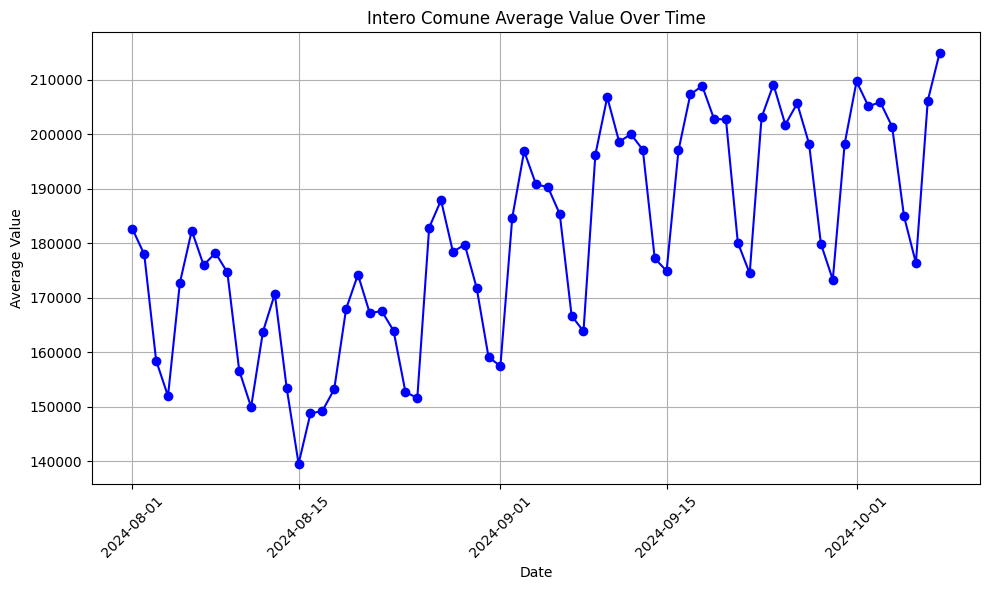

In [ ]:
import matplotlib.pyplot as plt

# Plotting the value over time
plt.figure(figsize=(10, 6))
plt.plot(intero_comune_avg_df['datetime'], intero_comune_avg_df['value'], marker='o', linestyle='-', color='b')
plt.title('Intero Comune Average Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Pollutants Combined with Attendance

In [ ]:
intero_comune_avg_df.head()

,datetime,value,areaAnalisi
0,2024-08-01,182666.656250,Intero Comune
1,2024-08-02,177945.312500,Intero Comune
2,2024-08-03,158447.510417,Intero Comune
3,2024-08-04,151934.687500,Intero Comune
4,2024-08-05,172720.031250,Intero Comune


## Edit and simplify to make useful the pollution data.

In [ ]:
# Convert 'entry_date' to datetime if necessary and extract only the date part
df_pollution['entry_date'] = pd.to_datetime(df_pollution['entry_date']).dt.date
df_pollution = df_pollution.drop(columns=['geometry', 'centroid'])
# Display the first few rows to verify the change
print(df_pollution.head())


   row  col  entry_date          CH4        CO      HCHO           NO2  \
0   15    5  2024-09-07  1931.078735  0.033016  0.000314  2.294748e-05   
1   15    5  2024-09-08  1931.078735  0.029585  0.000147  2.128617e-05   
2   15    5  2024-09-09  1923.200684  0.029587  0.000382  3.186791e-05   
3   15    5  2024-09-10  1923.200684  0.031236 -0.000039  1.569478e-05   
4   15    5  2024-09-11  1923.200684  0.036269  0.000107 -3.536028e-07   

         O3       SO2                 coordinates  
0  0.135462  0.000475  (8.889543024, 39.48228712)  
1  0.130883 -0.000146  (8.889543024, 39.48228712)  
2  0.126504 -0.000243  (8.889543024, 39.48228712)  
3  0.139296  0.000570  (8.889543024, 39.48228712)  
4  0.140820 -0.000297  (8.889543024, 39.48228712)  


In [ ]:
print(df_pollution.head())

   row  col  entry_date          CH4        CO      HCHO           NO2  \
0   15    5  2024-09-07  1931.078735  0.033016  0.000314  2.294748e-05   
1   15    5  2024-09-08  1931.078735  0.029585  0.000147  2.128617e-05   
2   15    5  2024-09-09  1923.200684  0.029587  0.000382  3.186791e-05   
3   15    5  2024-09-10  1923.200684  0.031236 -0.000039  1.569478e-05   
4   15    5  2024-09-11  1923.200684  0.036269  0.000107 -3.536028e-07   

         O3       SO2                 coordinates  
0  0.135462  0.000475  (8.889543024, 39.48228712)  
1  0.130883 -0.000146  (8.889543024, 39.48228712)  
2  0.126504 -0.000243  (8.889543024, 39.48228712)  
3  0.139296  0.000570  (8.889543024, 39.48228712)  
4  0.140820 -0.000297  (8.889543024, 39.48228712)  


In [ ]:
from shapely.geometry import Point
from geopy.distance import geodesic

# # Define the center and edge points (latitude, longitude)
center_point = (39.231913, 9.117391)

radius=5

def point_inside_circle(row):
    lon,lat = row['coordinates']
    point_coords = (lat, lon)
    distance_from_center = geodesic(center_point, point_coords).kilometers
    # print(distance_from_center)
    return distance_from_center <= radius

# Apply the function to filter rows where the coordinates lie inside the circle
df_pollution_filtered = df_pollution[df_pollution.apply(point_inside_circle, axis=1)]

# Display the filtered DataFrame
print(df_pollution_filtered.head())


      row  col  entry_date          CH4        CO      HCHO       NO2  \
1018   22    8  2024-09-07  1936.052490  0.033155  0.000084  0.000011   
1019   22    8  2024-09-08  1936.052490  0.030801  0.000137  0.000033   
1020   22    8  2024-09-09  1932.544312  0.030616  0.000201  0.000033   
1021   22    8  2024-09-10  1905.477905  0.034859  0.000179  0.000027   
1022   22    8  2024-09-11  1905.477905  0.036204  0.000008  0.000015   

            O3       SO2                  coordinates  
1018  0.135482 -0.000561  (9.081145677, 39.261547218)  
1019  0.131958 -0.000202  (9.081145677, 39.261547218)  
1020  0.126395  0.001870  (9.081145677, 39.261547218)  
1021  0.138760 -0.000043  (9.081145677, 39.261547218)  
1022  0.140922  0.000626  (9.081145677, 39.261547218)  


In [ ]:
# Group by 'entry_date' and calculate the average for all other attributes
daily_avg_pollution_df = df_pollution_filtered.groupby('entry_date').agg({
    'CH4': 'mean',    # Average of CH4 for each day
    'CO': 'mean',     # Average of CO for each day
    'HCHO': 'mean',   # Average of HCHO for each day
    'NO2': 'mean',    # Average of NO2 for each day
    'O3': 'mean',     # Average of O3 for each day
    'SO2': 'mean',    # Average of SO2 for each day
}).reset_index()

# Display the daily average for the city
print(daily_avg_pollution_df.head())


   entry_date          CH4        CO      HCHO       NO2        O3       SO2
0  2024-09-07  1933.706494  0.032617  0.000112  0.000011  0.135635  0.000009
1  2024-09-08  1933.706494  0.031512  0.000103  0.000032  0.132751 -0.000369
2  2024-09-09  1931.591349  0.031444  0.000170  0.000032  0.126547  0.000875
3  2024-09-10  1898.048136  0.036012  0.000189  0.000019  0.139463 -0.000071
4  2024-09-11  1898.048136  0.035779  0.000097  0.000012  0.140664  0.000426


In [ ]:
# Find all unique pairs of 'row' and 'col' in the filtered dataset
unique_row_col_pairs = df_pollution_filtered[['row', 'col']].drop_duplicates()

# Display the unique pairs of 'row' and 'col'
print(unique_row_col_pairs)


      row  col
1018   22    8
1034   22    9
1182   23    8
1204   23    9
1348   24    8
1370   24    9


##  Maps

In [ ]:
!pip install folium

In [ ]:
import folium

# Find all unique pairs of 'row' and 'col' along with their corresponding coordinates
unique_row_col_pairs = df_pollution_filtered[['row', 'col', 'coordinates']].drop_duplicates()

# Display the unique pairs of 'row', 'col', and coordinates
print(unique_row_col_pairs)

# Create a map centered around the average of all points
average_lat = unique_row_col_pairs['coordinates'].apply(lambda x: x[0]).mean()
average_lon = unique_row_col_pairs['coordinates'].apply(lambda x: x[1]).mean()

# Initialize the folium map
map_plot = folium.Map(location=[average_lat, average_lon], zoom_start=12)

# Add markers for each unique (row, col) with its coordinates
for _, row in unique_row_col_pairs.iterrows():
    lon,lat = row['coordinates']
    popup_text = f"Row: {row['row']}, Col: {row['col']}"
    folium.Marker([lat, lon], popup=popup_text).add_to(map_plot)

# Display the map
map_plot

      row  col                  coordinates
1018   22    8  (9.081145677, 39.261547218)
1034   22    9  (9.144897329, 39.261485348)
1182   23    8  (9.081109343, 39.230008837)
1204   23    9   (9.14483245, 39.229947036)
1348   24    8  (9.081073066, 39.198470284)
1370   24    9  (9.144767673, 39.198408552)


## Νέα ενότητα

In [ ]:
intero_comune_avg_df.head()

,datetime,value,areaAnalisi,date
0,2024-08-01,182666.656250,Intero Comune,2024-08-01
1,2024-08-02,177945.312500,Intero Comune,2024-08-02
2,2024-08-03,158447.510417,Intero Comune,2024-08-03
3,2024-08-04,151934.687500,Intero Comune,2024-08-04
4,2024-08-05,172720.031250,Intero Comune,2024-08-05


In [ ]:
# Rename the 'entry_date' column to 'datetime'
daily_avg_pollution_df.rename(columns={'entry_date': 'datetime'}, inplace=True)

# Display the updated DataFrame
print(daily_avg_pollution_df.head())

     datetime          CH4        CO      HCHO       NO2        O3       SO2
0  2024-09-07  1933.706494  0.032617  0.000112  0.000011  0.135635  0.000009
1  2024-09-08  1933.706494  0.031512  0.000103  0.000032  0.132751 -0.000369
2  2024-09-09  1931.591349  0.031444  0.000170  0.000032  0.126547  0.000875
3  2024-09-10  1898.048136  0.036012  0.000189  0.000019  0.139463 -0.000071
4  2024-09-11  1898.048136  0.035779  0.000097  0.000012  0.140664  0.000426


In [ ]:
import pandas as pd
# Merge the datasets on the 'date' column
attendance_weather_df = pd.merge(intero_comune_avg_df, daily_avg_pollution_df, on='datetime', how='inner')
attendance_weather_df = attendance_weather_df.drop(columns=['areaAnalisi'])
# Display the first few rows of the combined dataset
print(attendance_weather_df.head())


     datetime          value        date          CH4        CO      HCHO  \
0  2024-09-07  166669.541667  2024-09-07  1933.706494  0.032617  0.000112   
1  2024-09-08  163834.666667  2024-09-08  1933.706494  0.031512  0.000103   
2  2024-09-09  196282.593750  2024-09-09  1931.591349  0.031444  0.000170   
3  2024-09-10  206837.104167  2024-09-10  1898.048136  0.036012  0.000189   
4  2024-09-11  198657.322917  2024-09-11  1898.048136  0.035779  0.000097   

        NO2        O3       SO2  
0  0.000011  0.135635  0.000009  
1  0.000032  0.132751 -0.000369  
2  0.000032  0.126547  0.000875  
3  0.000019  0.139463 -0.000071  
4  0.000012  0.140664  0.000426  


# Weather Analysis

In [ ]:
import pandas as pd

In [ ]:
base_path = '/content/drive/My Drive/Quantum_Computers/QItaly_Challenge_Wizard/Datasets/weather/'

# Define paths for each dataset

path_weather = base_path + 'weather-010824-061024.csv'  # Data from Aug 1, 2024 to Aug 14, 2024


# Load the datasets into pandas DataFrames
weather_df = pd.read_csv(path_weather)

# Rename 'ts_get' to 'date_weather' in weather_df
weather_df.rename(columns={'ts_get': 'datetime'}, inplace=True)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime']).dt.date

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Quantum_Computers/QItaly_Challenge_Wizard/Datasets/weather/weather-010824-061024.csv'

In [ ]:
weather_df.head(5)

In [ ]:
# Aggregate the weather data by date
daily_weather_df = weather_df.groupby('datetime').agg({
    'hum': 'mean',           # Average humidity
    'pres': 'mean',          # Average pressure
    'rain_1h': 'sum',        # Total rainfall
    'wind_speed': 'mean',    # Average wind speed
    # 'wind_deg': 'mean',      # Average wind direction
    'clouds_all': 'mean',    # Average cloud cover
    'max_temp': 'max',       # Maximum temperature of the day
    'min_temp': 'min',       # Minimum temperature of the day
    'ave_temp': 'mean',      # Average temperature of the day
    'cod_weather': lambda x: ','.join(map(str, x.unique()))  # Keep distinct weather codes
}).reset_index()

# Display the aggregated daily weather data
print(daily_weather_df.head(30))


      datetime        hum         pres  rain_1h  wind_speed  clouds_all  \
0   2024-08-01  55.083333  1012.125000     0.00    2.865833    0.000000   
1   2024-08-02  43.833333  1008.333333     0.00    2.479167    0.000000   
2   2024-08-03  58.916667  1007.333333     2.30    5.682083   13.333333   
3   2024-08-04  57.416667  1010.208333     0.00    6.230833    0.000000   
4   2024-08-05  61.500000  1011.166667     0.00    3.882500    4.250000   
5   2024-08-06  58.416667  1011.250000     0.00    3.927917    0.125000   
6   2024-08-07  58.125000  1012.541667     0.00    3.058333    0.000000   
7   2024-08-08  50.375000  1013.458333     0.00    3.168750    0.208333   
8   2024-08-09  56.833333  1015.000000     0.00    3.617500    1.291667   
9   2024-08-10  67.166667  1016.791667     0.00    4.202500    4.166667   
10  2024-08-11  66.541667  1016.000000     0.00    3.774167    4.208333   
11  2024-08-12  57.083333  1012.250000     0.00    3.771250    0.000000   
12  2024-08-13  64.291667

In [ ]:
# Merge 'filtered_combined_df' with 'weather_df' on the 'date' column
merged_df = pd.merge(attendance_weather_df, weather_df, on='datetime', how='inner')

# Display the first few rows of the merged dataset
print(merged_df.head())


NameError: name 'attendance_weather_df' is not defined

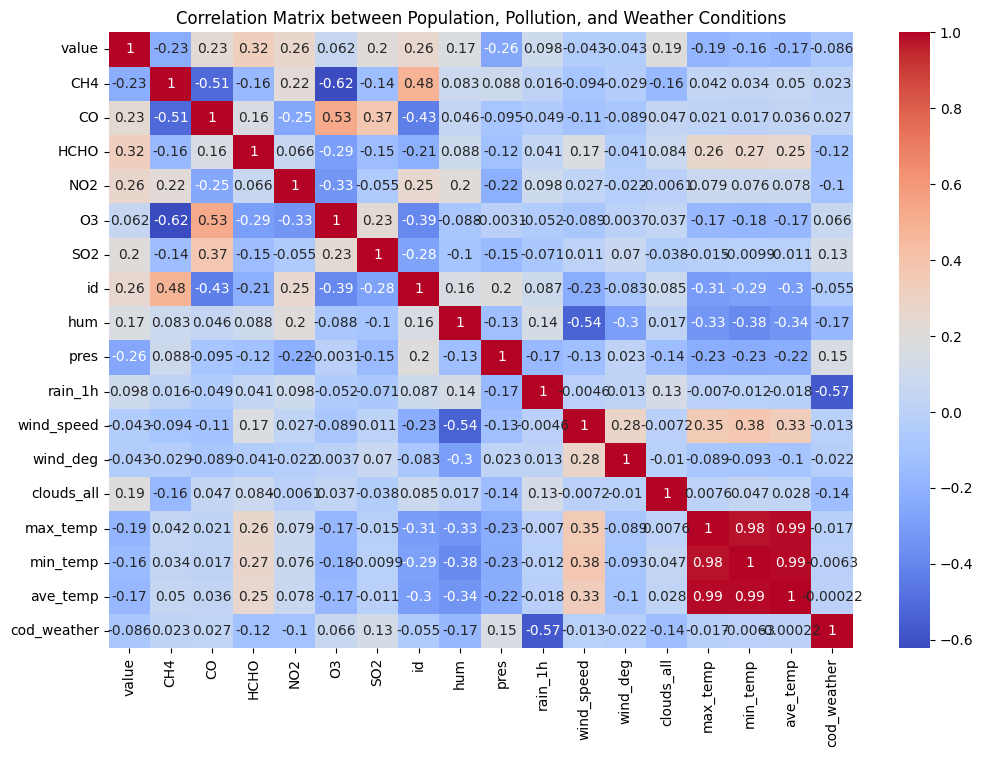

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'datetime' column before generating the correlation matrix
merged_df_cleaned = merged_df.drop(columns=['datetime','date'])

# Generate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = merged_df_cleaned.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between Population, Pollution, and Weather Conditions')
plt.show()


## Quantum Machine Learning for Weather Prediction

### QSVM

In [ ]:
import pandas as pd

# Load your weather dataset
def load_and_process_weather_data():
    # Load the data (assuming you upload the CSV in Colab)
    # data = pd.read_csv('weather_data.csv')

    # Select relevant features
    X = weather_df[['hum', 'pres', 'wind_speed', 'max_temp', 'min_temp']]

    # Map weather codes to categories (implement your own mapping function)
    def map_weather_code(code):
        if 200 <= code < 300:
            return 'thunderstorm'
        elif 300 <= code < 400:
            return 'drizzle'
        elif 500 <= code < 600:
            return 'rain'
        elif code == 800:
            return 'clear'
        else:
            return 'clouds'

    y = weather_df['cod_weather'].apply(map_weather_code)

    return X, y

# Load data
X, y = load_and_process_weather_data()


In [ ]:
X.head()
y.head()

,cod_weather
0,clear
1,clear
2,clear
3,clear
4,clear


In [ ]:
# Assuming 'y' is your DataFrame with one column 'cod_weather'

# Find the distinct weather codes and their count
distinct_weather_codes = y.str.split(',').explode().unique()
distinct_weather_codes_count = len(distinct_weather_codes)

# Print the count and the distinct weather codes
print(f"Number of distinct weather codes: {distinct_weather_codes_count}")
print("Distinct weather codes:", distinct_weather_codes)


Number of distinct weather codes: 5
Distinct weather codes: ['clear' 'rain' 'thunderstorm' 'clouds' 'drizzle']


In [ ]:
pip install cirq

In [ ]:
import numpy as np
import cirq
from cirq import ry


def build_weather_kernel(features):
    qubits = [cirq.LineQubit(i) for i in range(len(features))]
    circuit = cirq.Circuit()

    for i, feature in enumerate(features):
        circuit.append(ry(feature)(qubits[i]))  # Ry gate to encode feature

    return circuit

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2)

# Example QSVM circuit
def qsvm_circuit(X_train, X_test):
    # Build quantum circuits for train and test
    for sample in X_train:
        train_circuit = build_weather_kernel(sample)
        print(train_circuit)  # Example to visualize

    # Add logic to process test data and apply QSVM (custom implementation)
    # You can use Cirq simulators to run the quantum circuits

qsvm_circuit(X_train, X_test)


In [ ]:
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np

# Simulate a classical SVM as a baseline (QSVM extension can be added later)
def train_classical_svm(X_train, y_train, X_test, y_test):
    # Train a classical SVM for comparison
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Display accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    return y_pred, accuracy

# Call the function with training and test data
y_pred, accuracy = train_classical_svm(X_train, y_train, X_test, y_test)


Accuracy: 67.17%


### Qiskit Quantum Variatonal Classifier

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.8 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 12.6 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512546 sha256=882ac0738df04e780b4e0432581baa84dfd8bae2cf612318f295c6f3ddfeb29c
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.4 MB/s eta 0:00:00


In [ ]:
pip install qiskit.utils

In [ ]:
pip install pylatexenc

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
# from qiskit import Aer
# from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_algorithms.optimizers import COBYLA
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
weather_df

,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,datetime,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01,25.97,22.81,24.87,800
...,...,...,...,...,...,...,...,...,...,...,...,...
1653,43405,87,1013,0.0,3.09,340,20,2024-10-09,18.79,17.08,17.30,801
1654,43406,87,1012,0.0,2.06,340,97,2024-10-09,18.79,17.10,17.48,804
1655,43407,85,1012,0.0,1.03,0,97,2024-10-09,17.10,15.81,17.10,804
1656,43408,85,1013,0.0,1.03,60,0,2024-10-09,17.66,15.81,17.57,800


In [ ]:
# Use all features for X, excluding 'cod_weather'
X = weather_df.drop(columns=['cod_weather','datetime','id'])

# Define y by categorizing `cod_weather` into 5 classes
def categorize_weather(code):
    if 200 <= code < 300:
        return 'thunderstorm'
    elif 300 <= code < 400:
        return 'drizzle'
    elif 500 <= code < 600:
        return 'rain'
    elif 800 == code:
        return 'clear'
    elif 801 <= code < 900:
        return 'clouds'
    else:
        return 'other'  # For any codes not covered

# Apply the categorization to create y
y = weather_df['cod_weather'].apply(categorize_weather)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Encode labels (clear, rain, etc.)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
# Initialize the scaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# If you're using PCA, apply it to the normalized data
X_pca = pca.fit_transform(X_normalized)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


In [ ]:
y_encoded

array([0, 0, 0, ..., 1, 0, 0])

#### https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html#

In [ ]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    X_pca, y_encoded, train_size=0.8, random_state=algorithm_globals.random_seed
)

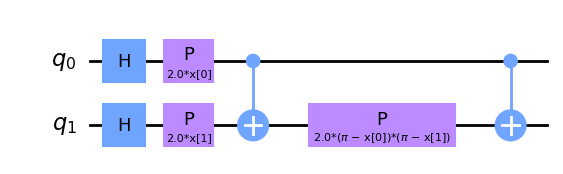

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = train_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

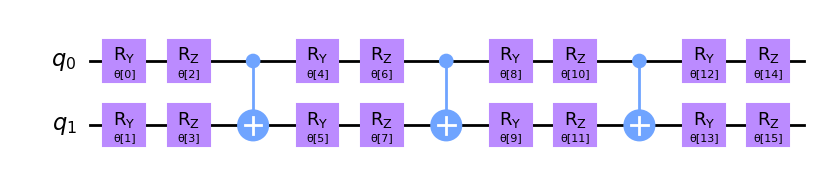

In [ ]:


from qiskit.circuit.library import RealAmplitudes

# ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
from qiskit.circuit.library import EfficientSU2

# Next asantx from https://qiskit-community.github.io/qiskit-machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html
ansatz = EfficientSU2(num_qubits=num_features, reps=3)


# Next asantx from https://github.com/qiskit-community/qiskit-machine-learning
# ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

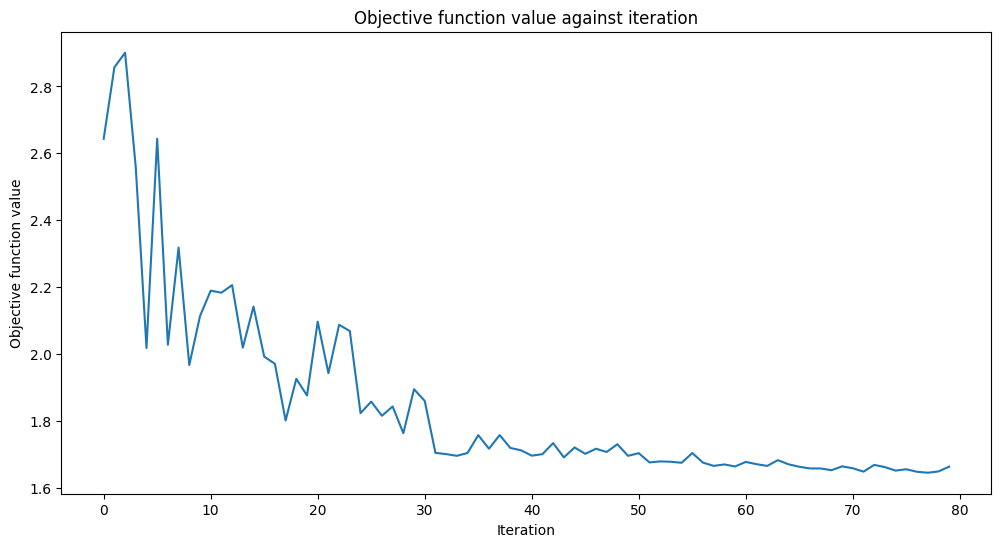

Training time: 425 seconds


In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
# Here we specify the backed/simulator on which the algorithm and the training will run
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=50)
sampler = Sampler(options={"shots": 512})

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.43
Quantum VQC on the test dataset:     0.44


#### Using the code found through github

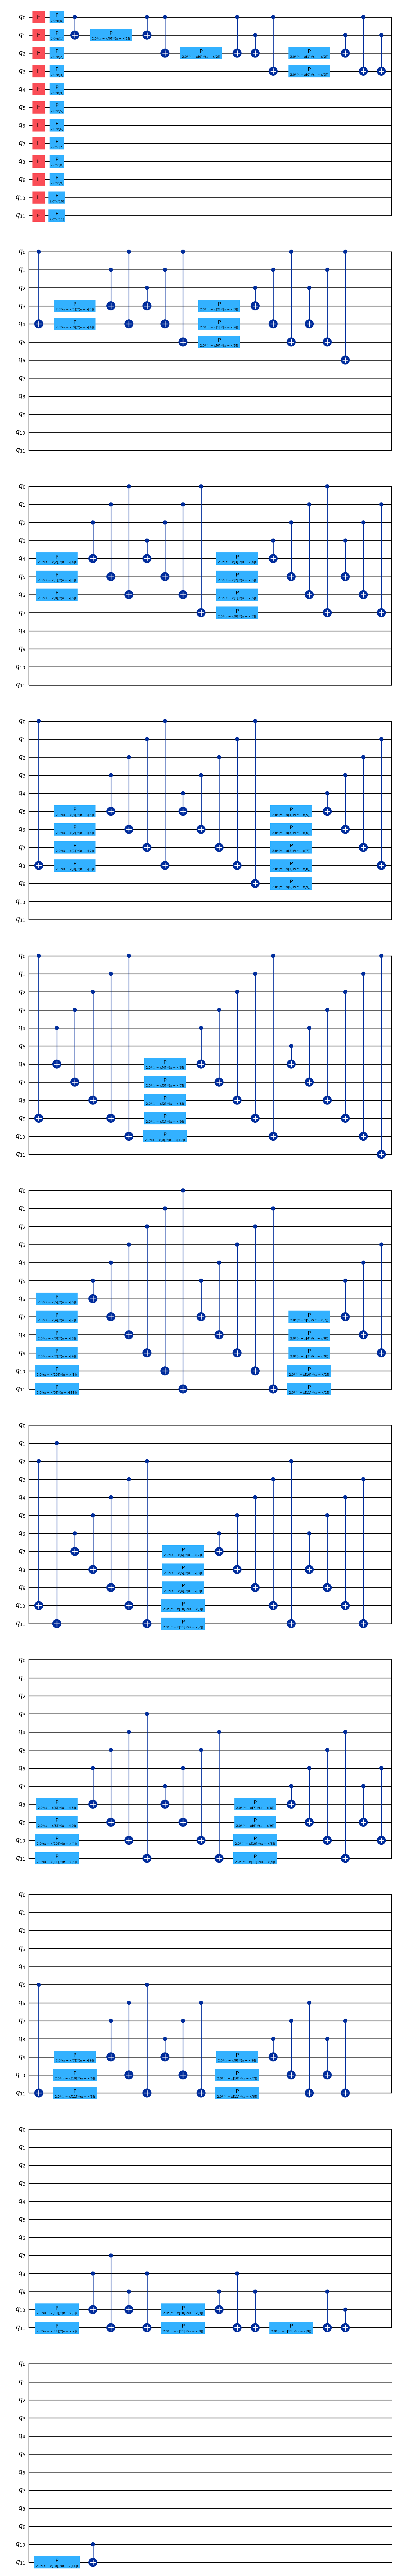

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = weather_df.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

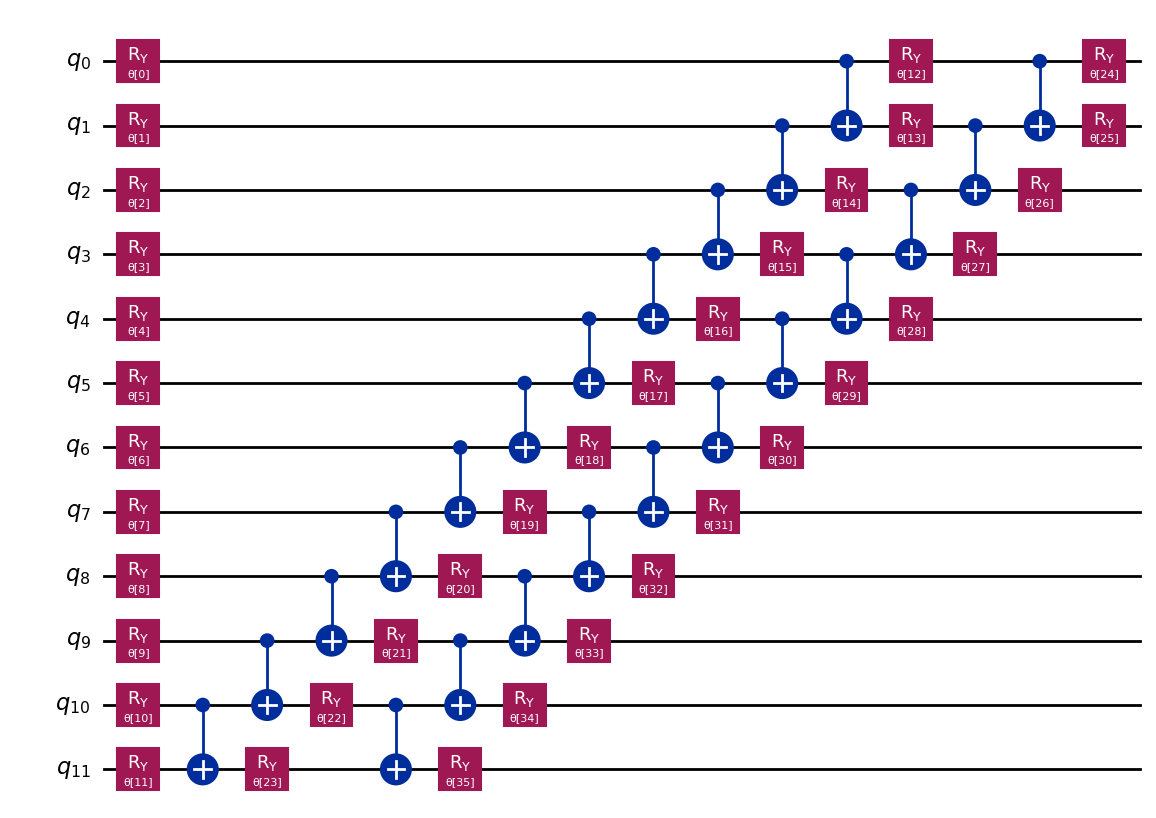

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

In [ ]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [ ]:
from qiskit_aer import Aer, transpile, execute

ImportError: cannot import name 'transpile' from 'qiskit_aer' (/usr/local/lib/python3.10/dist-packages/qiskit_aer/__init__.py)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.metrics import accuracy_score, classification_report

# Set a seed for reproducibility
seed = 1376
algorithm_globals.random_seed = seed

# Define the feature map using ZZFeatureMap
feature_dim = X_pca.shape[1]  # dimension of each data point (after PCA, it's 2)
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

# Define the ansatz using TwoLocal
ansatz = TwoLocal(num_qubits=feature_map.num_qubits, rotation_blocks=["ry", "rz"], entanglement_blocks="cz", reps=3)

# Initialize the Quantum Variational Classifier (VQC)
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=100),
)

# Train the classifier on the weather data
vqc.fit(X_train, y_train)

# Predict and evaluate on test data
y_pred = vqc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Quantum Variational Classifier: {accuracy * 100:.2f}%')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


KeyboardInterrupt: 

#### From Chatgpt

In [ ]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit
from qiskit_machine_learning.algorithms.classifiers import VQC

# Step 1: Define the variational quantum circuit
# Use TwoLocal ansatz (commonly used for variational classifiers)
var_circuit = TwoLocal(num_qubits=2, rotation_blocks=['ry', 'rz'], entanglement='linear', reps=3)

# Step 2: Define a simple feature map (optional) or directly use the circuit
def feature_map(x):
    circuit = QuantumCircuit(2)
    circuit.ry(x[0], 0)
    circuit.ry(x[1], 1)
    return circuit


In [ ]:
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector

# Use Aer simulator as backend
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024)

# Use COBYLA optimizer
optimizer = COBYLA(maxiter=100)

# Initialize the Quantum Variational Classifier (VQC)
vqc = VQC(feature_map=RawFeatureVector(2),
          ansatz=var_circuit,
          optimizer=optimizer,
          quantum_instance=quantum_instance)
